### Import Libraries

In [71]:
import pandas as pd
import numpy as np

### Load data

In [72]:
df = pd.read_csv("data/mypersonality.csv", encoding='cp1252')
df.columns

Index(['#AUTHID', 'STATUS', 'sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', 'cEXT',
       'cNEU', 'cAGR', 'cCON', 'cOPN', 'DATE', 'NETWORKSIZE', 'BETWEENNESS',
       'NBETWEENNESS', 'DENSITY', 'BROKERAGE', 'NBROKERAGE', 'TRANSITIVITY'],
      dtype='object')

In [73]:
keep_columns = ['#AUTHID', 'STATUS','sEXT', 'sNEU', 'sAGR', 'sCON', 'sOPN', \
                'cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']
df = df[keep_columns]
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y
1,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y
2,b7b7764cfa1c523e4e93ab2a79a946c4,is sore and wants the knot of muscles at the b...,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes how the day sounds in this new song.,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y
4,b7b7764cfa1c523e4e93ab2a79a946c4,is home. <3,2.65,3.0,3.15,3.25,4.4,n,y,n,n,y


In [74]:
df.shape

(9917, 12)

In [75]:
df.describe()

,sEXT,sNEU,sAGR,sCON,sOPN
count,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000
mean,3.354760,2.609453,3.616643,3.474201,4.130386
std,0.857578,0.760248,0.682485,0.737215,0.585672
min,1.330000,1.250000,1.650000,1.450000,2.250000
25%,2.710000,2.000000,3.140000,3.000000,3.750000
50%,3.400000,2.600000,3.650000,3.400000,4.250000
75%,4.000000,3.050000,4.150000,4.000000,4.550000
max,5.000000,4.750000,5.000000,5.000000,5.000000


In [76]:
df.isnull().sum()

#AUTHID    0
STATUS     0
sEXT       0
sNEU       0
sAGR       0
sCON       0
sOPN       0
cEXT       0
cNEU       0
cAGR       0
cCON       0
cOPN       0
dtype: int64

### Preprocess

In [77]:
# !pip install nltk

In [78]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;.<>]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove special characters, numbers, and extra whitespaces
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Remove mention
    text = re.sub("@[A-Za-z0-9]+", "", text)
    
    # Remove urls   
    text = re.sub(r'http\S+|www.\S+', '', text)
    
    # Remove bad symbols
    text = BAD_SYMBOLS_RE.sub('', text)
    text = REPLACE_BY_SPACE_RE.sub('', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Join tokens back into a sentence
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

# Example usage:
original_text = "This is an example sentence with some special characters and 123 numbers!"
cleaned_text = clean_text(original_text)
print("Original Text:", original_text)
print("Cleaned Text:", cleaned_text)

Original Text: This is an example sentence with some special characters and 123 numbers!
Cleaned Text: example sentence special characters numbers


In [79]:
# Clean text columns
df["STATUS"] = df["STATUS"].apply(clean_text)

In [80]:
# Target columns to replace
columns_to_replace = ['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']

# Replace 'y' with 1 and 'n' with 0 in the specified columns
df[columns_to_replace] = df[columns_to_replace].replace({'y': 1, 'n': 0})

In [81]:
df.head()

,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,cAGR,cCON,cOPN
0,b7b7764cfa1c523e4e93ab2a79a946c4,likes sound thunder,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1
1,b7b7764cfa1c523e4e93ab2a79a946c4,sleepy even funny thats cant get sleep,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1
2,b7b7764cfa1c523e4e93ab2a79a946c4,sore wants knot muscles base neck stop hurting...,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1
3,b7b7764cfa1c523e4e93ab2a79a946c4,likes day sounds new song,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1
4,b7b7764cfa1c523e4e93ab2a79a946c4,home,2.65,3.0,3.15,3.25,4.4,0,1,0,0,1


### Train Model - Classification

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [82]:
# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [60]:
X_train = train_df["STATUS"].to_list()
X_test = test_df["STATUS"].to_list()

In [61]:
target_column = 'cAGR'

y_train = train_df[target_column].to_list()
y_test = test_df[target_column].to_list()

In [20]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [21]:
# Train the Support Vector Machine (SVM) model
svm_model = SVC(kernel='linear')  # You can choose different kernels based on your data
svm_model.fit(X_train_tfidf, y_train)

SVC(kernel='linear')

In [22]:
# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

In [23]:
# Step 5: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5892137096774194
Confusion Matrix:
[[441 486]
 [329 728]]
Classification Report:
              precision    recall  f1-score   support

           n       0.57      0.48      0.52       927
           y       0.60      0.69      0.64      1057

    accuracy                           0.59      1984
   macro avg       0.59      0.58      0.58      1984
weighted avg       0.59      0.59      0.58      1984



#### Save model

In [23]:
import joblib

In [24]:
# Save the model to a file
joblib.dump(svm_model, 'svm_model.joblib')

['svm_model.joblib']

In [25]:
# Save vectorizer to a file
joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')

['tfidf_vectorizer.joblib']

#### Load model

In [26]:
import joblib

# Load the model from the file
loaded_model = joblib.load('svm_model.joblib')

vectorizer = joblib.load('tfidf_vectorizer.joblib')

#### Inference

In [27]:
# Assuming you have a new text or a list of new texts for inference
new_texts = ["This is a positive example.", "I don't like this at all.", "Neutral statement."]

# Vectorize the new texts using the same TF-IDF vectorizer
new_texts_tfidf = vectorizer.transform(new_texts)

# Make predictions using the trained SVM model
predictions = loaded_model.predict(new_texts_tfidf)

# Print the predictions
for text, prediction in zip(new_texts, predictions):
    print(f"Text: {text}\nPredicted Label: {prediction}\n")

Text: This is a positive example.
Predicted Label: y

Text: I don't like this at all.
Predicted Label: y

Text: Neutral statement.
Predicted Label: y



### Train multiple models

In [83]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [84]:
def get_vectorized_data(save_vectorizer=False):
    
    X_train = train_df["STATUS"].to_list()
    X_test = test_df["STATUS"].to_list()

    # TF-IDF Vectorization
    vectorizer = TfidfVectorizer()
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    
    # Save model
    if save_vectorizer == True:
        print("Saving vectorizer")
        joblib.dump(vectorizer, 'tfidf_vectorizer.joblib')
    
    return X_train_tfidf, X_test_tfidf


def get_target_label(target_name='cAGR'):

    y_train = train_df[target_name].to_list()
    y_test = test_df[target_name].to_list()
    
    return y_train, y_test

In [85]:
def train_and_evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test, target_name, save_model=False):
    
    # Train the Support Vector Machine (SVM) model
    svm_model = SVC(kernel='linear')
    svm_model.fit(X_train_tfidf, y_train)
    
    # Save model
    if save_model == True:
        print("Saving model...")
        joblib.dump(svm_model, f'{target_name}_model.joblib')

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test_tfidf)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print the results
    print(f"Results for {target_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{conf_matrix}")
    print(f"Classification Report:\n{classification_rep}")
    print("\n" + "=" * 40 + "\n")

In [86]:
X_train_tfidf, X_test_tfidf = get_vectorized_data(save_vectorizer=True)
target_columns = ['cEXT', 'cNEU', 'cAGR', 'cCON', 'cOPN']

for target_column in target_columns:
    y_train, y_test = get_target_label(target_name=target_column)
    train_and_evaluate_model(X_train_tfidf, X_test_tfidf, y_train, y_test, target_column, save_model=True)

Saving vectorizer
Saving model...
Results for cEXT:
Accuracy: 0.6018145161290323
Confusion Matrix:
[[866 265]
 [525 328]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.77      0.69      1131
           1       0.55      0.38      0.45       853

    accuracy                           0.60      1984
   macro avg       0.59      0.58      0.57      1984
weighted avg       0.59      0.60      0.59      1984



Saving model...
Results for cNEU:
Accuracy: 0.6486895161290323
Confusion Matrix:
[[1106  149]
 [ 548  181]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1255
           1       0.55      0.25      0.34       729

    accuracy                           0.65      1984
   macro avg       0.61      0.56      0.55      1984
weighted avg       0.62      0.65      0.61      1984



Saving model...
Results for cAGR:
Accuracy: 0.5892137096774194
Con

### Train Model - Regression

In [28]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler

In [35]:
X = df["STATUS"].to_list()
y = df['sOPN'].to_list()

In [54]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(X_test)

(7933, 1984)

In [62]:
# Convert text to TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [55]:
# Standardize the target values
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()
y_train_scaled

array([ 0.63686944,  0.20938495,  0.03839116, ...,  0.12388805,
        0.12388805, -0.64558402])

In [70]:
# Create and train the Support Vector Regression model
svr_model = SVR(kernel='linear', C=1.0, epsilon=0.2)
svr_model.fit(X_train_tfidf, y_train_scaled)

SVR(epsilon=0.2, kernel='linear')

In [71]:
# Make predictions on the test set
y_pred_scaled = svr_model.predict(X_test_tfidf)

# Inverse transform the predictions to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))

In [72]:
y_pred

array([[4.22046551],
       [3.65289042],
       [4.22589312],
       ...,
       [4.64664182],
       [3.73180293],
       [3.91904495]])

In [73]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3558922573809569


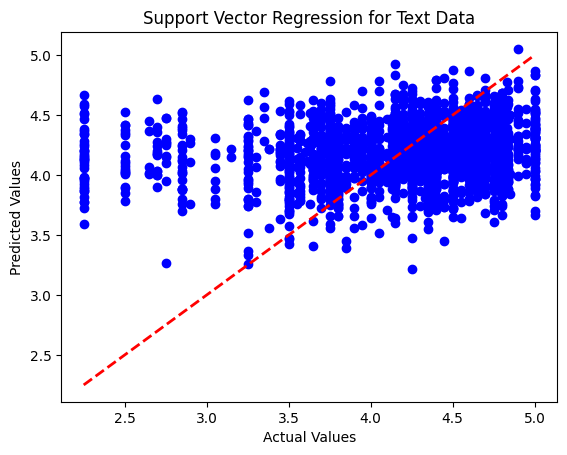

In [74]:
# Plot the results
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression for Text Data')
plt.show()

#### Save model

In [82]:
import joblib

joblib.dump(svr_model, 'svr_model.joblib')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
joblib.dump(scaler_y, 'scalar.joblib')

['scalar.joblib']

#### Load model

In [88]:
import joblib

# Load the model from the file
loaded_model = joblib.load('svr_model.joblib')
vectorizer = joblib.load('tfidf_vectorizer.joblib')
scalar = joblib.load('scalar.joblib')

#### Inference

In [89]:
# Assuming you have a new text data for which you want to make predictions
new_text_data = ["how are you."]

# Transform the new text data using the same TF-IDF vectorizer
new_text_tfidf = tfidf_vectorizer.transform(new_text_data)

# Make predictions on the new text data
y_pred_scaled = loaded_model.predict(new_text_tfidf)

# Assuming you have the scaler_y used during training
# Inverse transform the predictions to get them back to the original scale
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))[0][0]

# Display the predictions
print("Predicted Personality Trait Scores:", y_pred)

Predicted Personality Trait Scores: 4.2154687152346995
